In [19]:
# Activate project enviroment 
using Pkg
Pkg.activate(".")
Pkg.instantiate()

  Activating project at `c:\Users\Herbert\Documents\GitHub\AMO_Indivdiual_Project`


In [27]:
using DataFrames
using CSV
using Plots
using Clustering
using StatsPlots
using Statistics

## Generating operating conditions by via Clustering

In this notebook, we read in hourly power consumption values for the year 2022 in germany and cluster the values in order to acquire 4 operating consditions with weights, which represent our target year. The values are normalized by dividing by the mean hourly value. (Source: https://www.smard.de/home/downloadcenter/download-marktdaten/ )

In [21]:
#Read in hourly power consumption for the year 2022 in germany.

demands = CSV.read("./data/consumption_2022.csv", DataFrame)

Row,Date,Start,End,Total,Residual,Hydro
,String15,String15,String15,String15,String15,String15
1,"Jan 1, 2022",12:00 AM,1:00 AM,"43,915.5","12,452.25","2,539.25"
2,"Jan 1, 2022",1:00 AM,2:00 AM,"41,535.75","11,480","2,866.25"
3,"Jan 1, 2022",2:00 AM,3:00 AM,"40,480.75","11,818.75","3,203.75"
4,"Jan 1, 2022",3:00 AM,4:00 AM,"39,564","12,183","3,708"
5,"Jan 1, 2022",4:00 AM,5:00 AM,"39,338.25","13,256.75","3,910"
6,"Jan 1, 2022",5:00 AM,6:00 AM,"38,826.5","14,800.75","3,244.5"
7,"Jan 1, 2022",6:00 AM,7:00 AM,"38,413","14,722.75","2,701.5"
8,"Jan 1, 2022",7:00 AM,8:00 AM,"39,086.75","16,280.25","2,245"
9,"Jan 1, 2022",8:00 AM,9:00 AM,"40,305","19,239.5","2,055.75"


In [22]:
describe(demands)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Nothing,String15,Nothing,String15,Int64,DataType
1,Date,,"Apr 1, 2022",,"Sep 9, 2022",0,String15
2,Start,,10:00 AM,,9:00 PM,0,String15
3,End,,10:00 AM,,9:00 PM,0,String15
4,Total,,"34,607",,"78,680.75",0,String15
5,Residual,,"10,039.25",,"9,980.25",0,String15
6,Hydro,,0,,998.25,0,String15


In [23]:
demands.Total = replace.(demands.Total, "," => "") # Format 
demands.Total = parse.(Float64, demands.Total) # Convert to Float64

8760-element Vector{Float64}:
 43915.5
 41535.75
 40480.75
 39564.0
 39338.25
 38826.5
 38413.0
 39086.75
 40305.0
 42511.0
 44382.5
 46732.25
 47314.75
     ⋮
 53124.75
 52772.75
 51655.25
 51518.75
 51761.25
 53630.25
 53628.5
 52057.25
 48922.75
 46585.75
 45315.25
 44246.25

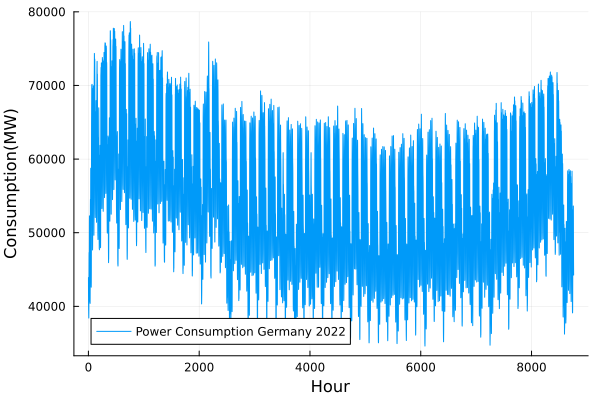

In [24]:
plot(1:nrow(demands),demands.Total,label="Power Consumption Germany 2022", xlabel = "Hour", ylabel = "Consumption(MW)",bandwidth= 0.01,formatter = :plain)

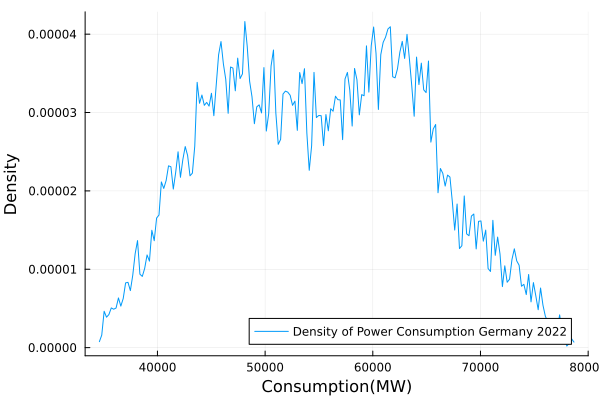

In [25]:
density(demands.Total,label="Density of Power Consumption Germany 2022", ylabel = "Density", xlabel = "Consumption(MW)",bandwidth= 0.01,formatter = :plain,legend = :bottomright)

In [28]:
power_levels = reshape(demands.Total ./ mean(demands.Total),1,8760) #normalize by dividing by mean
km = kmeans(power_levels,4) #Cluster by Kmeans with 4 centers
centers = km.centers

1×4 Matrix{Float64}:
 1.09936  1.25909  0.932355  0.77741

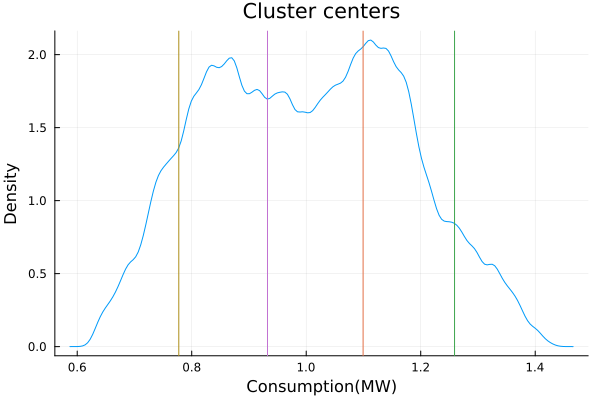

In [30]:
density(demands.Total ./ mean(demands.Total),label="Density of Power Consumption Germany 2022", ylabel = "Density", xlabel = "Consumption(MW)",bandwidth= 0.01,formatter = :plain,legend = false,title="Cluster centers")
vline!(centers)

In [31]:
# get weights for each cluster
weigths = counts(km)/8760 

4-element Vector{Float64}:
 0.3132420091324201
 0.16267123287671234
 0.2800228310502283
 0.24406392694063928

In [32]:
# Export operating conditions with weights
out = DataFrame(powerlevel = vec(centers), weight = weigths)
CSV.write("./data/options.csv", out)

"./data/options.csv"